# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [47]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)  
cities

['punta arenas',
 'vaini',
 'provideniya',
 'katsuura',
 'hamilton',
 'ushuaia',
 'lokoja',
 'bredasdorp',
 'cabedelo',
 'goderich',
 'lompoc',
 'danilov',
 'nizhneyansk',
 'victoria',
 'moerai',
 'cape town',
 'mataura',
 'geraldton',
 'iberia',
 'cuautepec',
 'dikson',
 'artyk',
 'zachary',
 'rikitea',
 'hithadhoo',
 'mackay',
 'bukachacha',
 'hobart',
 'souillac',
 'bambous virieux',
 'puerto ayora',
 'hofn',
 'ovalle',
 'aykhal',
 'catamarca',
 'flinders',
 'chapais',
 'beyla',
 'salalah',
 'lorengau',
 'pevek',
 'guhagar',
 'atuona',
 'lima',
 'sedam',
 'butaritari',
 'sao filipe',
 'airai',
 'karaul',
 'tocantinopolis',
 'pueblo nuevo',
 'mar del plata',
 'dingle',
 'camacha',
 'tupaciguara',
 'turukhansk',
 'taolanaro',
 'caravelas',
 'busselton',
 'norman wells',
 'rucheng',
 'bonavista',
 'catuday',
 'hay river',
 'arraial do cabo',
 'katherine',
 'port elizabeth',
 'sinop',
 'altay',
 'kapaa',
 'ribeira grande',
 'jamestown',
 'faanui',
 'esperance',
 'new norfolk',
 'saint-g

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [48]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
responseT = []
response = {}
query_url = f"{url}appid={weather_api_key}&units={units}&q="
temp = []
lat = []
clouds = []
lon = []
wind = []
maxTemp = []
city = []
country = []
date = []
humidity = []
response2 = requests.get(query_url + 'new norfolk').json()
response2

{'coord': {'lon': 147.06, 'lat': -42.78},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 67.35,
  'feels_like': 57.13,
  'temp_min': 64.4,
  'temp_max': 72,
  'pressure': 1005,
  'humidity': 40},
 'visibility': 10000,
 'wind': {'speed': 14.99, 'deg': 140},
 'clouds': {'all': 40},
 'dt': 1579573268,
 'sys': {'type': 1,
  'id': 9545,
  'country': 'AU',
  'sunrise': 1579546693,
  'sunset': 1579600016},
 'timezone': 39600,
 'id': 2155415,
 'name': 'New Norfolk',
 'cod': 200}

In [50]:
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        clouds.append(response['clouds']['all'])
        maxTemp.append(response['main']['temp_max'])
        lon.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        #city.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        time.sleep(1.000)

response

{'coord': {'lon': 10.77, 'lat': 3.65},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'model',
 'main': {'temp': 69.57,
  'feels_like': 74.97,
  'temp_min': 69.57,
  'temp_max': 69.57,
  'pressure': 1011,
  'humidity': 97,
  'sea_level': 1011,
  'grnd_level': 939},
 'wind': {'speed': 2.8, 'deg': 318},
 'clouds': {'all': 86},
 'dt': 1579573943,
 'sys': {'country': 'CM', 'sunrise': 1579584578, 'sunset': 1579627564},
 'timezone': 3600,
 'id': 2231881,
 'name': 'Eseka',
 'cod': 200}

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | sesheke
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | kropotkin
Processing Record 23 of Set 1 | but

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
zippedList =  list(zip(cities, clouds, country, date, humidity, lat, lon, maxTemp, wind))
cityWeatherDF = pd.DataFrame(zippedList, columns = ['City' , 'Clouds', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temperature', 'Wind Speed'])
cityWeatherDF.to_csv("CityWeather.csv")
CityWeather = pd.read_csv("CityWeather.csv")
CityWeather

,Unnamed: 0,City,Clouds,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,0,punta arenas,40,CL,1579573328,67,-53.15,-70.92,57.20,12.75
1,1,vaini,20,TO,1579573329,66,-21.20,-175.20,84.20,12.75
2,2,provideniya,75,RU,1579573330,71,64.38,-173.30,3.20,4.47
3,3,katsuura,20,JP,1579573332,40,35.13,140.30,57.99,24.16
4,4,hamilton,90,US,1579573333,68,39.18,-84.53,26.01,4.70
...,...,...,...,...,...,...,...,...,...,...
542,542,lingao,100,MG,1579573938,94,-20.28,44.28,75.00,4.43
543,543,kharp,26,CL,1579573940,91,-25.40,-70.48,61.70,0.51
544,544,yuncheng,75,MU,1579573941,88,-20.01,57.66,80.01,10.78
545,545,sangar,93,IN,1579573942,92,34.17,77.58,-3.87,3.89


City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [55]:
CityWeather["Humidity"]

0      67
1      66
2      71
3      40
4      68
       ..
542    94
543    91
544    88
545    92
546    97
Name: Humidity, Length: 547, dtype: int64

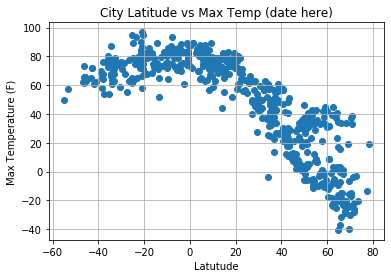

In [56]:
plt.scatter(CityWeather["Lat"], CityWeather["Max Temperature"])
plt.title(f'City Latitude vs Max Temp (date here)')
plt.xlabel("Latutude")
plt.ylabel("Max Temperature (F)")
plt.grid()

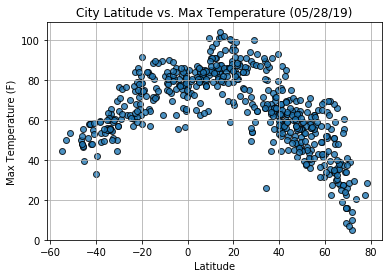

#### Latitude vs. Humidity Plot

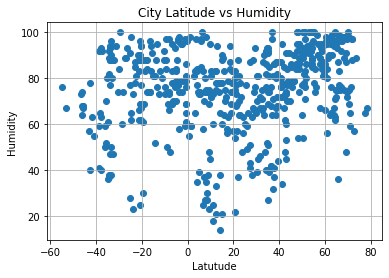

In [57]:
plt.scatter(CityWeather["Lat"], CityWeather["Humidity"])
plt.title('City Latitude vs Humidity')
plt.xlabel("Latutude")
plt.ylabel("Humidity")
plt.grid()

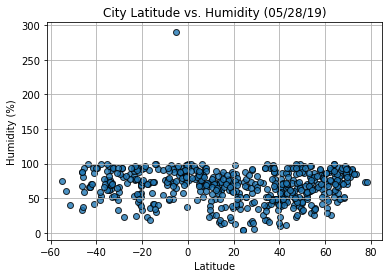

#### Latitude vs. Cloudiness Plot

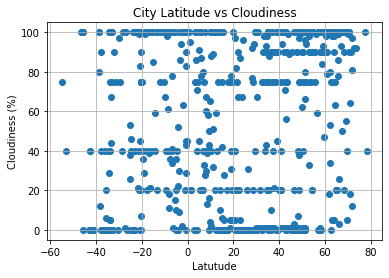

In [59]:
plt.scatter(CityWeather["Lat"], CityWeather["Clouds"])
plt.title('City Latitude vs Cloudiness')
plt.xlabel("Latutude")
plt.ylabel("Cloudiness (%)")
plt.grid()

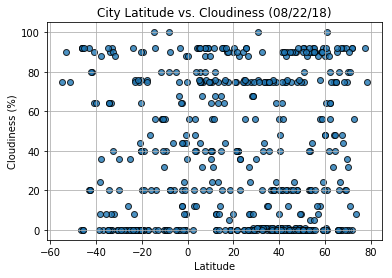

#### Latitude vs. Wind Speed Plot

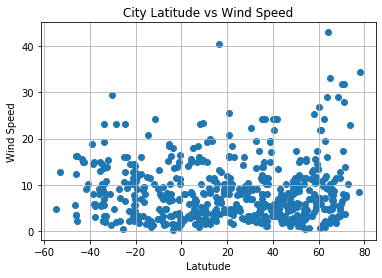

In [60]:
plt.scatter(CityWeather["Lat"], CityWeather["Wind Speed"])
plt.title('City Latitude vs Wind Speed')
plt.xlabel("Latutude")
plt.ylabel("Wind Speed")
plt.grid()

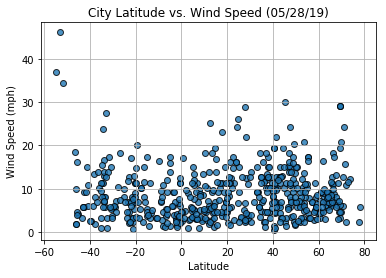

## Linear Regression

In [81]:
# OPTIONAL: Create a function to create Linear Regression plots
#x_values = CityWeather['Lat']
#y_values = CityWeather['Max Temperature']
def LatPlot():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.grid()
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [70]:
# Create Northern and Southern Hemisphere DataFrames
NorthHemi = CityWeather[CityWeather['Lat'] >= 0]
SouthHemi = CityWeather[CityWeather['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8709582072785867


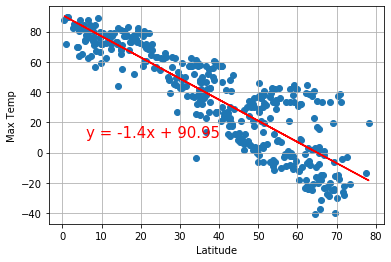

In [82]:
x_values = NorthHemi['Lat']
y_values = NorthHemi['Max Temperature']
plt.ylabel('Max Temp')
LatPlot()

The r-squared is: -0.8151657406810827


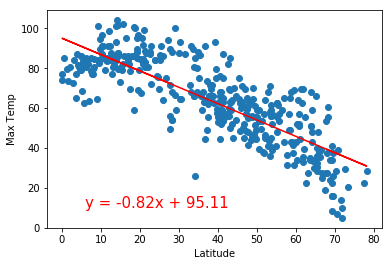

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5403170022369733


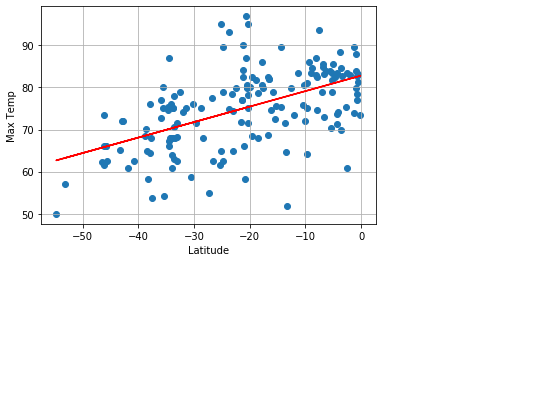

In [83]:
x_values = SouthHemi['Lat']
y_values = SouthHemi['Max Temperature']
plt.ylabel('Max Temp')
LatPlot()

The r-squared is: 0.760263355051646


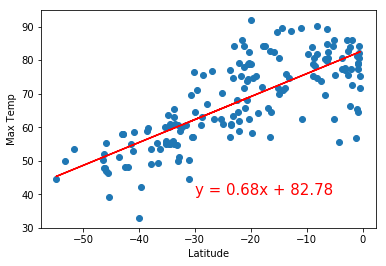

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.40204591884743324


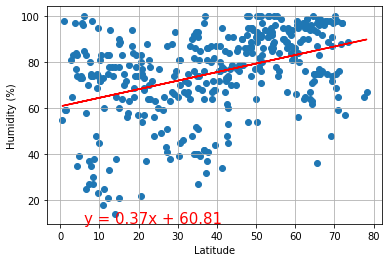

In [84]:
x_values = NorthHemi['Lat']
y_values = NorthHemi['Humidity']
plt.ylabel('Humidity (%)')
LatPlot()

The r-squared is: 0.10358336015746494


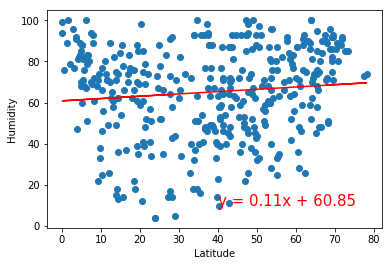

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.23199250295090343


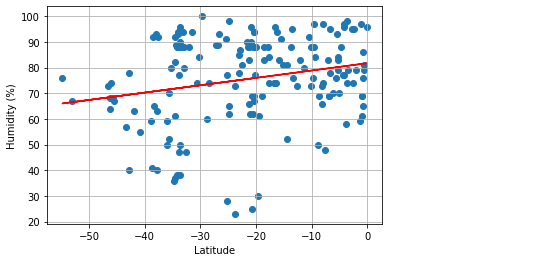

In [86]:
x_values = SouthHemi['Lat']
y_values = SouthHemi['Humidity']
plt.ylabel('Humidity (%)')
LatPlot()

The r-squared is: 0.14689473425583055


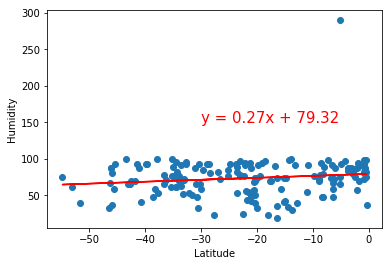

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2694861153829345


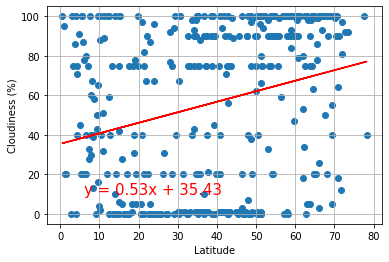

In [85]:
x_values = NorthHemi['Lat']
y_values = NorthHemi['Clouds']
plt.ylabel('Cloudiness (%)')
LatPlot()

The r-squared is: -0.08733547918934018


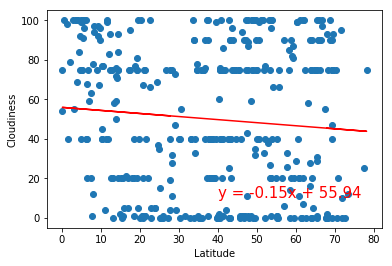

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06537617852302084


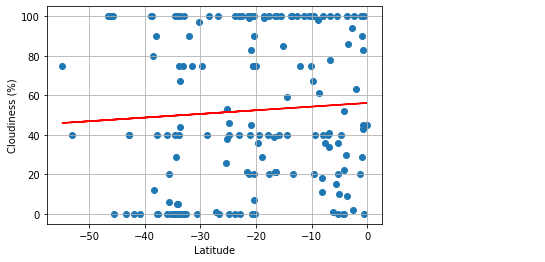

In [87]:
x_values = SouthHemi['Lat']
y_values = SouthHemi['Clouds']
plt.ylabel('Cloudiness (%)')
LatPlot()

The r-squared is: 0.21881426893991618


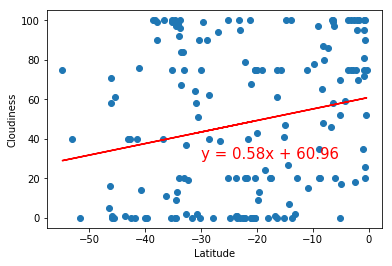

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09051237657662915


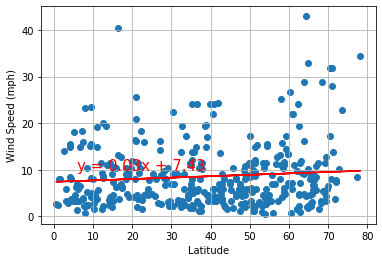

In [88]:
x_values = NorthHemi['Lat']
y_values = NorthHemi['Wind Speed']
plt.ylabel('Wind Speed (mph)')
LatPlot()

The r-squared is: 0.1071382774388479


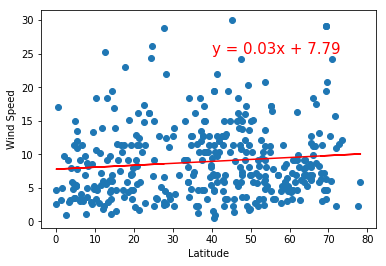

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.14618649127884567


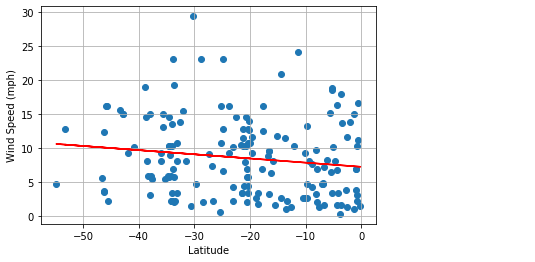

In [89]:
x_values = SouthHemi['Lat']
y_values = SouthHemi['Wind Speed']
plt.ylabel('Wind Speed (mph)')
LatPlot()

The r-squared is: -0.322483077139538


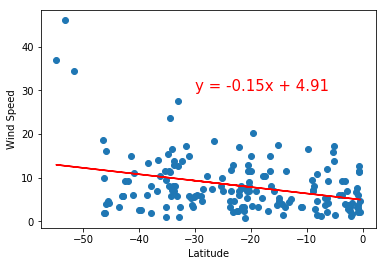